In [1]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import tikzplotlib as tpl


In [2]:
df = pd.read_csv('bandit_decision_exp5000.csv',  sep = ';', index_col=False)

In [3]:
# print(df)
print(df[(df['batch']=='lin') &(df['bsize']==50)& (df['data']=='Uncalibrated')].shape[0])

118


In [4]:
experiments = [['Uncalibrated', 'DP'], ['Uncalibrated', 'EO'], ['FICO', 'DP'], ['FICO', 'EO']]
exp = ['Synthetic DP', 'Synthetic EO', 'FICO DP', 'FICO EO']

# fix
al = 0.25

# variable
beta = [0.01, 0.1]

seed = [1,2,3,4,5,6,7,8,9,10]

batch = 'exp'
bsize = 1


In [5]:
res={}
i = 0
# !!!!!!! chose here exp 1 or lin 50
dfx = df[(df['batch']==batch) & (df['alpha'] == al)&(df['bsize']==bsize)]

for e in experiments:
    bdict = {}

    for b in beta:
        # here put alpha == 0.25 in real experiment
        dfe = dfx[(dfx['data']==e[0]) & (dfx['fair']==e[1]) & (dfx['beta']==b)]
        A = []
        F = []
        for s in seed:
    
            dfel= dfe[(dfe['seed'] == s)]
            acc = dfel['acc'].values.squeeze()
            dfa = np.fromstring(""+acc, dtype=np.float64, sep=',')
            
            fair = dfel[str(e[1])].values.squeeze()
            dff = np.fromstring(""+fair, dtype=np.float64, sep=',')

            if s == 1 :
                A = dfa
                F = dff

            else:
                A = np.vstack((A,dfa))
                F = np.vstack((F,dff))


        meanA = A.mean(axis=0)
        stdevA = A.std(axis=0, dtype = np.float64)
        meanF = F.mean(axis=0)
        stdevF = F.std(axis=0, dtype = np.float64)
        
        steps = np.fromstring(dfe['axis'].iloc[0], dtype=np.int, sep=',')
        
        bdict[str(b)] = [[meanA, stdevA], [meanF, stdevF], steps]

    res[exp[i]] = bdict
    i+=1
    
# print(resA)
# print(resF)


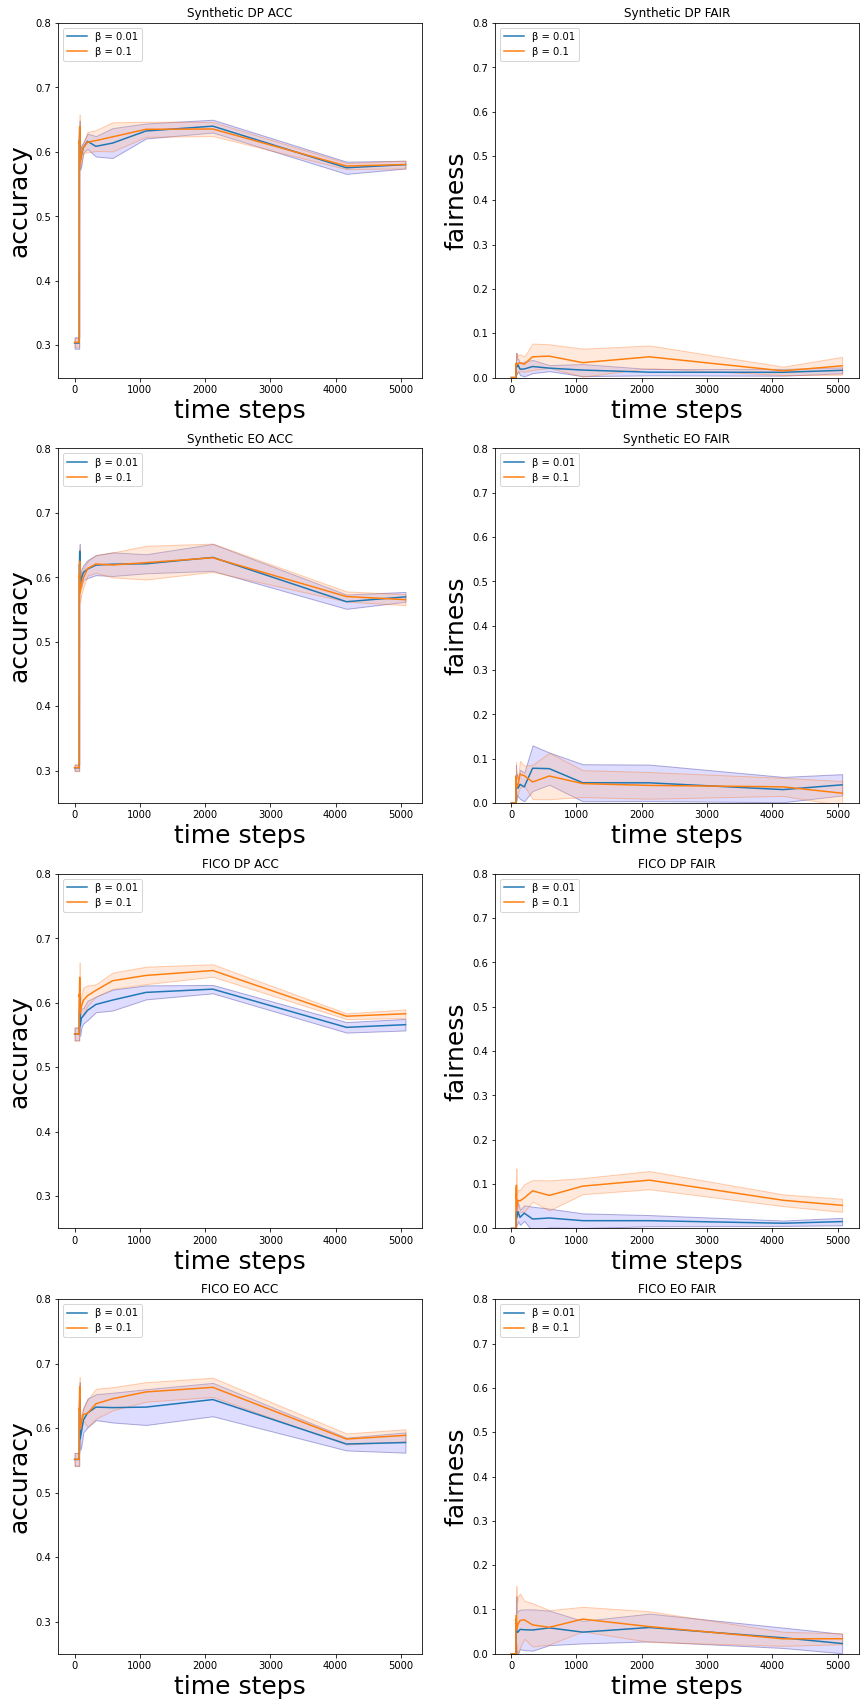

In [6]:
x_label = "time steps"


measure_dict = res
# print(measure_dict)

num_columns = 4
num_rows = 4

figure = plt.figure(figsize=(30, 30))
grid = GridSpec(nrows=num_rows, ncols=num_columns, figure=figure)


current_row = 0
columns = [0,1]


for key, value in measure_dict.items():

    # 0: ACC, 1: Fair
    title = ['ACC', 'FAIR']
    ysetting = [[0.25,0.8], [0,0.8]]
    ylabels = ['accuracy', 'fairness']
    for c in columns:
        axis = figure.add_subplot(grid[current_row, c])
        ecolor=['#060080','#ff6503']
        fcolor=['#928CFF','#FFB98C']
 
        # b = 0.01, 0.1
        i=0
        for b in beta:
            timesteps = value[str(b)][2]
            # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
            mean = value[str(b)][c][0]
            stdv = value[str(b)][c][1]
            
            ts = timesteps[0]-1
            mean = np.insert(mean, 0, np.ones(ts)*mean[0])
            stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
       
            y_TQ = mean+stdv
            y_FQ = mean-stdv
        
            timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
            
            axis.plot(timesteps, mean, label=('\u03B2 = '+str(b)))
            axis.fill_between(timesteps, y_FQ,
                          y_TQ,
                          alpha=0.3,
                          edgecolor=ecolor[i],
                          facecolor=fcolor[i])
            
            
            axis.legend(loc='upper left') 
            axis.title.set_text(key+' '+title[c])
            i +=1

        axis.set_ylim(ysetting[c])
        axis.set_ylabel(ylabels[c], fontsize=25)
        axis.set_xlabel(x_label, fontsize=25)
        axis.set_xscale("linear")
        
    current_row +=1




# base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
# file_path = "{}/plot_exp3.png".format(base_save_path)
# plt.savefig(file_path)
# tpl.save(file_path.replace(".png", ".tex"),
#          figure=figure,
#          axis_width='\\figwidth',
#          axis_height='\\figheight',
#          tex_relative_path_to_data='.',
#          extra_groupstyle_parameters={"horizontal sep=1.2cm"})


# plt.show()
# plt.close('all')

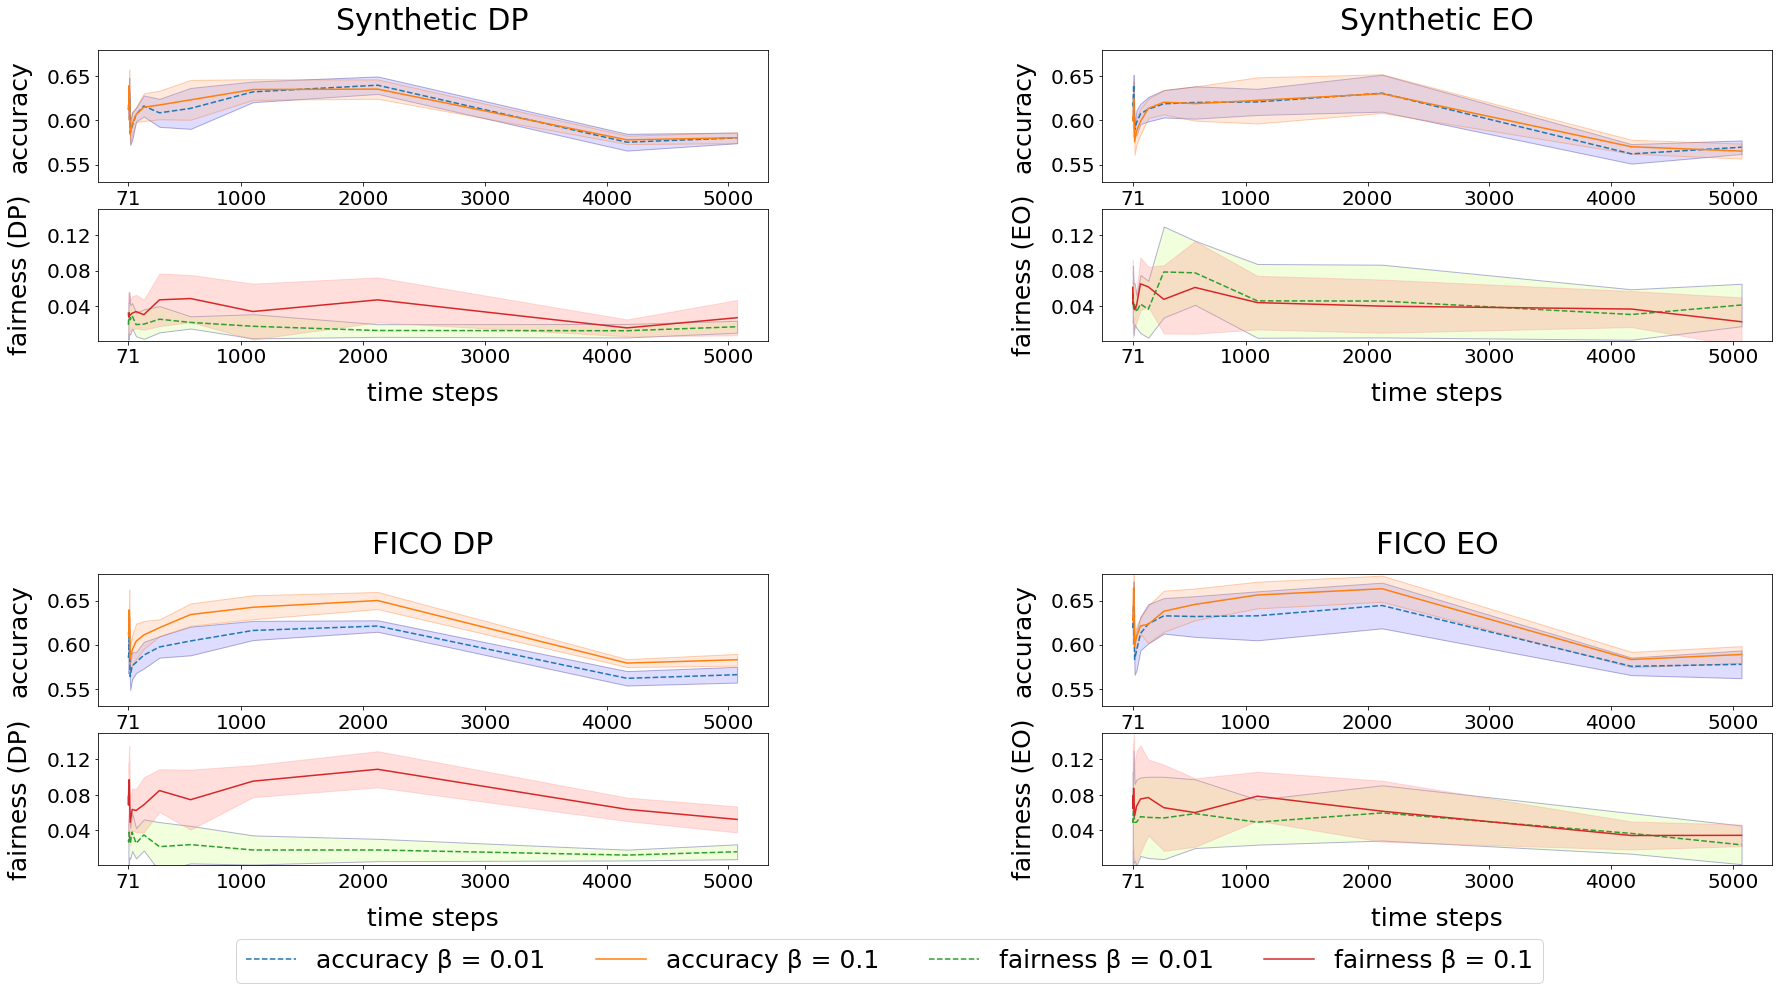

In [7]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20

x_label = "time steps"


measure_dict = res
# print(measure_dict)

num_columns = 4
num_rows = 4

figure = plt.figure(figsize=(30, 15))
# grid = GridSpec(nrows=8, ncols=2, figure=figure)

# gs0 = gridspec.GridSpec(2, 2, figure=f)
# gs0.update(wspace=0.3, hspace=0.7)


grid = GridSpec(nrows=2, ncols=2, figure=figure)
grid.update(wspace=0.5, hspace=0.8)

rows = [0,1]
ysetting = [[0.53,0.68], [0,0.15]]

ic = 0
li = 0

ylabels = ['accuracy', 'fairness']
ecolor=['#060080','#ff6503', '#060080', '#ff938c']
fcolor=['#928CFF', '#FFB98C','#D3FF8C','#ff938c']
lcolor = ['C0','C1','C2','C3']
pos = [71, 1000, 2000, 3000, 4000, 5000]
posy = [[0.55, 0.60, 0.65],[0.04, 0.08, 0.12]]
# columnrows = [[0,0], [0,1], [2,0], [2,1]]   
# columnrows = [[0,0], [0,1], [1,0], [1,1]]   

for key, value in measure_dict.items():
    i =0
#     current_row = columnrows[ic][0]
#     current_column = columnrows[ic][1]
    
    if i == 0:
        gs = GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[ic])
    else:
        gs = grid[ic].subgridspec(2, 1)

    for c in rows: 
#         axis = figure.add_subplot(grid[current_row, current_column])
        axis = figure.add_subplot(gs[c, 0])
        axis.set_yticks(posy[c])
    
        if c == 0:
            axis.set_title(key, fontsize = 30)
        if c ==1 :
            axis.set_xlabel(x_label, fontsize=25, labelpad=15)
            axis.set_xscale("linear")
        for b in beta:
            timesteps = value[str(b)][2][1:]
            # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
            mean = value[str(b)][c][0][1:]
            stdv = value[str(b)][c][1][1:]
       
            # option 1 : reevaluate with new evaluation (should be 0 fairness for first phase!)
#             ts = timesteps[0]-1
#             mean = np.insert(mean, 0, np.ones(ts)*mean[0])
#             stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
       
            y_TQ = mean+stdv
            y_FQ = mean-stdv
        
#             timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
            if ic == 0:
                if b == beta[1]:
                    axis.plot(timesteps, mean, color = lcolor[i], label=(ylabels[c] +' \u03B2 = '+str(b)))
                else:
                    axis.plot(timesteps, mean, linestyle = '--', color = lcolor[i], label=(ylabels[c] +' \u03B2 = '+str(b)))
            else:
                if b == beta[1]:
                    axis.plot(timesteps, mean, color = lcolor[i])
                else:
                    axis.plot(timesteps, mean, linestyle = '--', color = lcolor[i])
                
                
            axis.fill_between(timesteps, y_FQ,
                          y_TQ,
                          alpha=0.3,
                          edgecolor=ecolor[i],
                          facecolor=fcolor[i])
            
            for tick in axis.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
            for tick in axis.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
            
            axis.set_xticks(pos)
            
            if c == 0:
                axis.set_ylabel(ylabels[c], fontsize=25, labelpad=15)
            else:
                axis.set_ylabel(ylabels[c] + " (" + str(experiments[ic][1] + ")"), fontsize=25, labelpad=15)
            axis.set_ylim(ysetting[c])
            
            i +=1
        current_row +=1
#         axis.set_xlim((71, 5071))
            
    ic +=1
    
figure.legend(loc='lower center', ncol=4, fontsize=25, frameon = True)    


base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp32.png".format(base_save_path)
plt.savefig(file_path)
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})


plt.show()
plt.close('all')

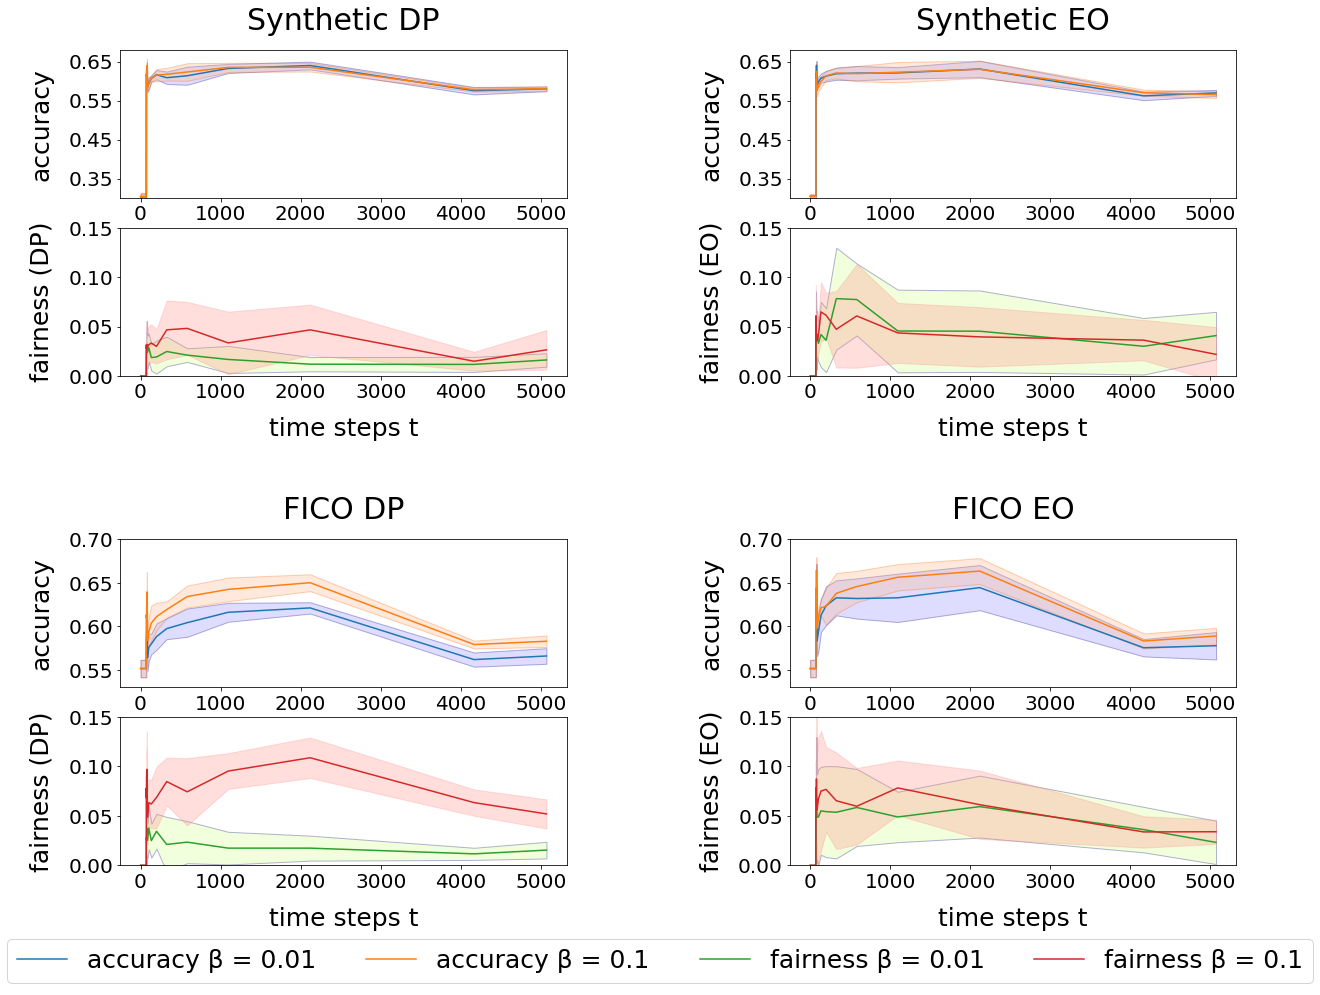

In [8]:
from matplotlib import rcParams
rcParams['axes.titlepad'] = 20 

x_label = "time steps t"


measure_dict = res
# print(measure_dict)

num_columns = 4
num_rows = 4

figure = plt.figure(figsize=(20, 15))
# grid = GridSpec(nrows=8, ncols=2, figure=figure)

# gs0 = gridspec.GridSpec(2, 2, figure=f)
# gs0.update(wspace=0.3, hspace=0.7)


grid = GridSpec(nrows=2, ncols=2, figure=figure)
grid.update(wspace=0.5, hspace=0.5)

rows = [0,1]
ysetting = [[0.3,0.68], [0,0.15]]
ysetting2 = [[0.53,0.65], [0,0.15]]

ic = 0
li = 0

ylabels = ['accuracy', 'fairness']
ecolor=['#060080','#ff6503', '#060080', '#ff938c']
fcolor=['#928CFF', '#FFB98C','#D3FF8C','#ff938c']
lcolor = ['C0','C1','C2','C3']
# pos = [0, 1000, 2000, 3000, 4000, 5000]
posy = [[0.35, 0.45, 0.55, 0.65],[0.00, 0.05, 0.10, 0.15]]
posy2 = [[0.55, 0.60, 0.65, 0.70,],[0.00, 0.05, 0.10, 0.15]]
# columnrows = [[0,0], [0,1], [2,0], [2,1]]   
# columnrows = [[0,0], [0,1], [1,0], [1,1]]   

for key, value in measure_dict.items():
    i =0
    yi = 0

#     current_row = columnrows[ic][0]
#     current_column = columnrows[ic][1]
    
    if i == 0:
        gs = GridSpecFromSubplotSpec(2, 1, subplot_spec=grid[ic])
    else:
        gs = grid[ic].subgridspec(2, 1)

    for c in rows: 

#         axis = figure.add_subplot(grid[current_row, current_column])
        axis = figure.add_subplot(gs[c, 0])
        
    
        if c == 0:
            axis.set_title(key, fontsize = 30)
        if c ==1 :
            axis.set_xlabel(x_label, fontsize=25, labelpad=15)
            axis.set_xscale("linear")
        for b in beta:
            timesteps = value[str(b)][2]
            # value={b : [[A_mean, A_std],[F_mean, F_std], [timesteps]]}
            mean = value[str(b)][c][0]
            stdv = value[str(b)][c][1]
            
            ts = timesteps[0]-1
            mean = np.insert(mean, 0, np.ones(ts)*mean[0])
            stdv = np.insert(stdv, 0, np.ones(ts)*stdv[0])
       
            y_TQ = mean+stdv
            y_FQ = mean-stdv
        
            timesteps= np.insert(timesteps, 0, range(1,timesteps[0]))
            
            if ic == 0:
                axis.plot(timesteps, mean, color = lcolor[i], label=(ylabels[c] +' \u03B2 = '+str(b)))
                
            else:
                axis.plot(timesteps, mean, color = lcolor[i])
                
            axis.fill_between(timesteps, y_FQ,
                          y_TQ,
                          alpha=0.3,
                          edgecolor=ecolor[i],
                          facecolor=fcolor[i])
            
            for tick in axis.xaxis.get_major_ticks():
                tick.label.set_fontsize(20)
            for tick in axis.yaxis.get_major_ticks():
                tick.label.set_fontsize(20) 
            
#            axis.set_xticks(pos2) 
            
            if c == 0:
                axis.set_ylabel(ylabels[c], fontsize=25, labelpad=15)
            else:
                axis.set_ylabel(ylabels[c] + " (" + str(experiments[ic][1] + ")"), fontsize=25, labelpad=15)
                
            if ic < 2:
                axis.set_ylim(ysetting[c])
                axis.set_yticks(posy[c])

            else:
                axis.set_ylim(ysetting2[c])
                axis.set_yticks(posy2[c])
                
            i +=1
        current_row +=1
#         axis.set_xlim((71, 5071))
            
    ic +=1
    
figure.legend(loc='lower center', ncol=4, fontsize=25, frameon = True)    


base_save_path = "/Users/mrateike/PycharmProjects/fair_minimonster/final_results"
file_path = "{}/plot_exp3.png".format(base_save_path)
plt.savefig(file_path)
tpl.save(file_path.replace(".png", ".tex"),
         figure=figure,
         axis_width='\\figwidth',
         axis_height='\\figheight',
         tex_relative_path_to_data='.',
         extra_groupstyle_parameters={"horizontal sep=1.2cm"})


plt.show()
plt.close('all')